# Advanced Machine Learning Lab (PDS2101)


Submitted By : Subrat Ku Nanda

## Experiment - 6
Aim of your experiment : LSTM and its implementation (Stock Price as a Time Series Data)

### Theory

**Stock Price as a Time Series Data**

Treating stock data as time-series, one can use past stock prices (and other parameters) to predict the stock prices for the next day or week. Machine learning models such as Recurrent Neural Networks (RNNs) or LSTMs are popular models applied to predicting time series data such as weather forecasting, election results, house prices, and, of course, stock prices.


<br>


The idea is to weigh out the importance of recent and older data and determine which parameters affect the “current” or “next” day prices the most. The machine learning model assigns weights to each market feature and determines how much history the model should look at to predict future stock prices.

**LSTM**

Long Short Term Memory(LSTM) is a special type of Recurrent Neural Network(RNN) which can retain important information over time using memory cells.

This property of LSTMs makes it a wonderful algorithm to learn sequences that are interdependent and can help to build solutions like language translation, sales time series, chatbots, autocorrections, next word suggestions, etc.

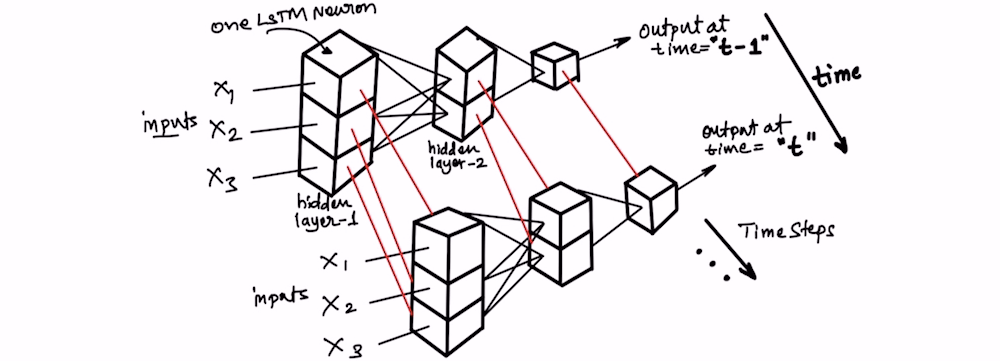

**Stock Price Prediction using Moving Average Time Series**

<br>

To begin with, we can use moving averages (or MA) to understand how the amount of history (or the number of past data points) considered affects the model's performance. A simple moving average computes the mean of the past N data points and takes this value as the predicted N+1 value.

So,

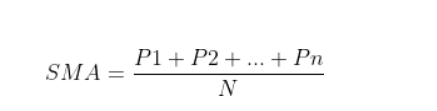

 Stock Price Prediction using Moving Average Time Series



Where P1 to Pn are n immediate data points that occur before the present, so to predict the present data point, we take the SMA of the size n (meaning that we see up to n data points in the past). The SMA is our predicted value. The precision of the model will vary significantly with the choice of n. Higher n would mean that we are willing to go deeper into the past to compute the present value. For example, n=2 means that we take the average of the stock price of the past two days, while n=50 would consider 50 days' worth of stock prices. Obviously, 50 days’ worth of data will have more information about the trends of the stock and would lead to better predictions. However, based on context, a large n can also destabilize the model as the more granular fluctuations are smoothened off – looking at prices from the past 300 days would be sub-optimal.

Another moving average is the exponential moving average (EMA), giving more weight to the more recent samples. With this, we can look at more data points in the past and still not diminish the more recent trends in fluctuations.

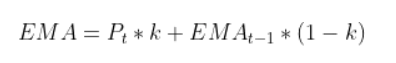

exponential moving average



Where Pt is the price at time t and k is the weight given to that data point. EMA(t-1) represents the value computed from the past t-1 points. Clearly, this would perform better than a simple MA. The weight k is computed as k = 2/(N+1).

While implementing these methods, we will see how EMA performs better than SMA, proving that assigning higher weights to more recent data points will yield more fruitful results. But for now, let us assume that that is the case with stock prices as time series data.

So considering more past data and giving more importance to newer samples, EMA performs better than SMA. However, given the static nature of its parameters, EMA might not perform well for all cases. In EMA, we have fixed the value of k (the weight/significance of past data), and it is linked with the window size N (how much past we wish to consider).

It can be difficult to set these parameters manually and impossible to optimize. Thus, we can use more complex models that can compute the significance of each past data point and optimize our predictions. This can be achieved with weight updation while training a machine learning model. And thinking of using past data to compute the future, the most immediate model that comes to mind is the LSTM model!

**Understanding Long Short Term Memory Network for Stock Price Prediction**

LSTM is a Recurrent Neural Network that works on data sequences, learning to retain only relevant information from a time window. New information the network learns is added to a “memory” that gets updated with each timestep based on how significant the new sample seems to the model. Over the years, LSTM has revolutionized speech and handwriting recognition, language understanding, forecasting, and several other applications that have become the new normal today.

A standard LSTM cell comprises of three gates: the input, output, and forget gate. These gates learn their weights and determine how much of the current data sample should be remembered and how much of the past learned content should be forgotten. This simple structure is an improvement over the previous and similar RNN model.

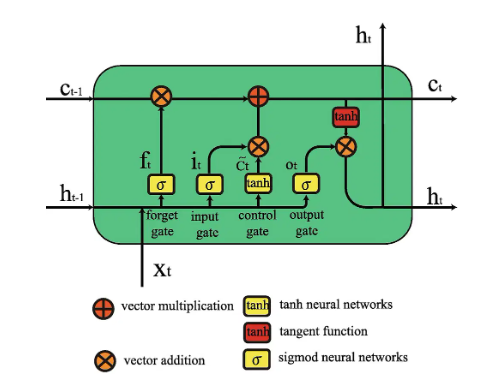

As seen in the equations below, i, f, and o represent the three gates: input, forget, and output. C is the cell state that preserves the learned data, which is given as output h. All of this is computed for each timestamp t, considering the learned data from timestamp (t-1).

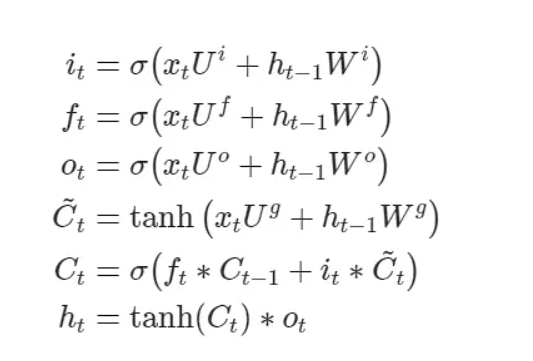

The forget gate decides what information and how much of it can be erased from the current cell state, while the input gate decides what will be added to the current cell state. The output gate, used in the final equation, controls the magnitude of output computed by the first two gates.

So, as opposed to standard feed-forward neural nets, LSTMs have the potential to remember or erase portions of the past data windows actively. Its feature of reading and training on windows (or timesteps) of data makes its training unique. Let’s build the model in Python.

**Evaluating Prediction Performance for Stock Price Prediction**

Before putting the algorithms into practice, let’s clarify the metric to measure the performance of our models. Stock price prediction being a fundamental regression problem, we can use RMSE (Root Mean Squared Error) or MAPE (Mean Absolute Percentage Error) to measure how close or far off our price predictions are from the real world.

Looking closely at the formula of RMSE, we can see how we will be able to consider the difference (or error) between the actual (At) and predicted (Ft) price values for all N timestamps and get an absolute measure of error.

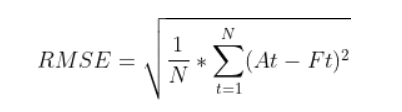

On the other hand, MAPE looks at the error concerning the true value – it will measure relatively how far off the predicted values are from the truth instead of considering the actual difference. This is a good measure to keep the error ranges in check if we deal with too large or small values. For instance, RMSE for values in the range of 10e6 might blow out of proportion, whereas MAPE will keep error in a fixed range.

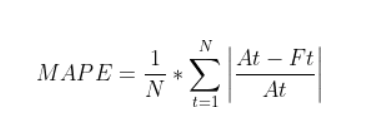

### Source Code

**Stock Price Prediction Project using Machine Learning in Python with Source Code**

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# Using Yahoo Finance

# install the nsepy library to get stock prices

!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import modules
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# initialize parameters
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

# get the data
StockData = yf.download('INFY', start = start_date,
                   end = end_date)

print(StockData.shape)
StockData.head()

[*********************100%***********************]  1 of 1 completed
(251, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,25.389999,25.540001,25.150000,25.260000,24.382210,4526700
2022-01-04,25.250000,25.370001,24.980000,25.110001,24.237425,8180900
2022-01-05,24.840000,24.920000,24.250000,24.299999,23.455570,8881400
2022-01-06,24.200001,24.490000,23.969999,24.110001,23.272173,11523300
2022-01-07,24.219999,24.370001,23.969999,24.200001,23.359047,6596500


In [ ]:
# Creating a column as date
StockData['TradeDate']=StockData.index
StockData.head()

,Open,High,Low,Close,Adj Close,Volume,TradeDate
Date,,,,,,,
2022-01-03,25.389999,25.540001,25.150000,25.260000,24.382210,4526700,2022-01-03
2022-01-04,25.250000,25.370001,24.980000,25.110001,24.237425,8180900,2022-01-04
2022-01-05,24.840000,24.920000,24.250000,24.299999,23.455570,8881400,2022-01-05
2022-01-06,24.200001,24.490000,23.969999,24.110001,23.272173,11523300,2022-01-06
2022-01-07,24.219999,24.370001,23.969999,24.200001,23.359047,6596500,2022-01-07


Visualizing the stock prices movement

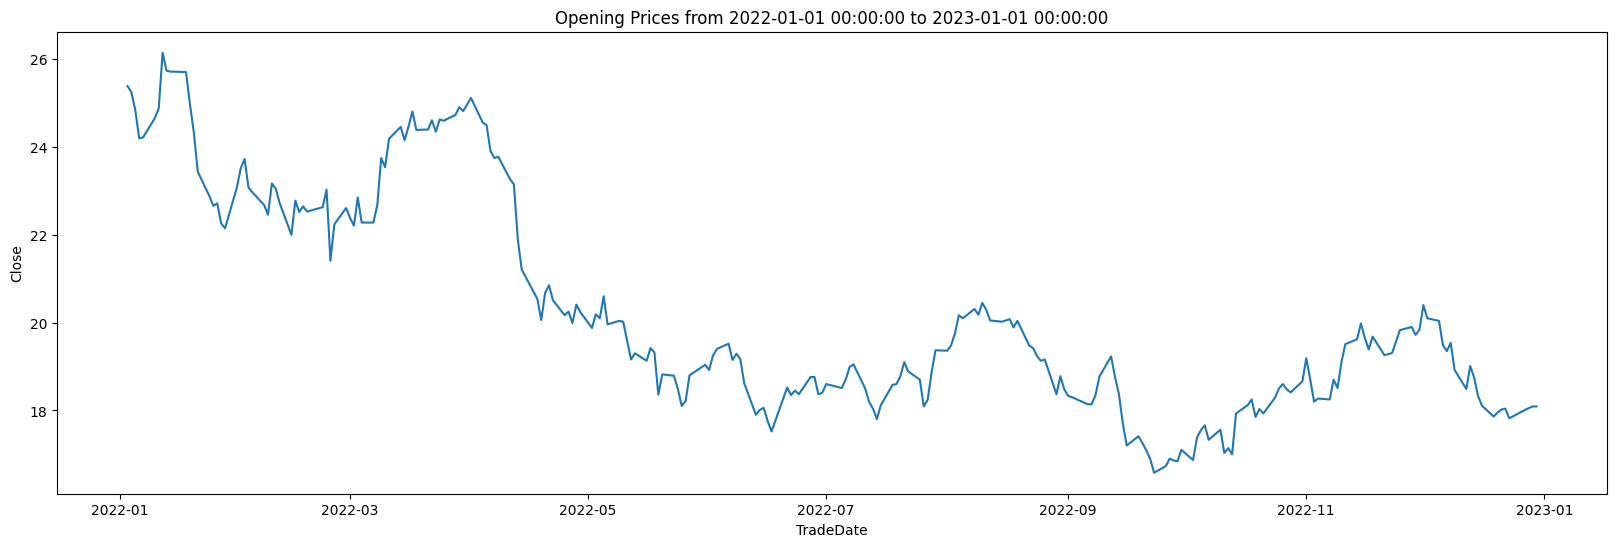

In [ ]:
# display
plt.figure(figsize = (20,6))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(StockData['Open'])
plt.xlabel("TradeDate")
plt.ylabel("Close")
plt.show()

**Preparing the data**


The LSTM model will need data input in the form of X Vs y. Where the X will represent the last 10 day’s prices and y will represent the 11th-day price.

By looking at a lot of such examples from the past 2 years, the LSTM will be able to learn the movement of prices. Hence, when we pass the last 10 days of the price it will be able to predict tomorrow’s stock close price.

Since LSTM is a Neural network-based algorithm, standardizing or normalizing the data is mandatory for a fast and more accurate fit.

In [ ]:
# Extracting the closing prices of each day
FullData=StockData[['Close']].values
print(FullData[0:5])

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

print('\n ### After Normalization ### \n')
X[0:5]

[[25.26000023]
 [25.11000061]
 [24.29999924]
 [24.11000061]
 [24.20000076]]

 ### After Normalization ### 



array([[0.90198118],
       [0.88633992],
       [0.8018768 ],
       [0.78206464],
       [0.79144943]])

Preparing the data for LSTM


In [ ]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
# Reshape the Input as a 3D (number of samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('\n#### Input Data shape ####')
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
print('\n#### Output Data shape ####')
print(y_data.shape)


#### Input Data shape ####
(241, 10, 1)

#### Output Data shape ####
(241, 1)


In [ ]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

############################################

# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(236, 10, 1)
(236, 1)

#### Testing Data shape ####
(5, 10, 1)
(5, 1)


**Visualizing the input and output data for LSTM**


In [ ]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp,'--', out)

[[0.90198118]
 [0.88633992]
 [0.8018768 ]
 [0.78206464]
 [0.79144943]
 [0.85088631]
 [0.87695513]
 [0.95307604]
 [0.93743479]
 [1.        ]] -- [0.92805]
[[0.88633992]
 [0.8018768 ]
 [0.78206464]
 [0.79144943]
 [0.85088631]
 [0.87695513]
 [0.95307604]
 [0.93743479]
 [1.        ]
 [0.92805   ]] -- [0.81960361]


**Creating the Deep Learning LSTM model**

Using the LSTM function instead of Dense to define the hidden layers. The output layer has one neuron as we are predicting the next day price, if you want to predict for multiple days, then change the input data and neurons equal to the number of days of forecast.

In [ ]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


Hyperparameters of LSTM


*   **units=10:** This means we are creating a layer with ten neurons in it. Each of these five neurons will be receiving the values of inputs.

*   **input_shape = (TimeSteps, TotalFeatures):** The input expected by LSTM is in 3D format. Our training data has a shape of (420, 10, 1) this is in the form of (number of samples, time steps, number of features). This means we have 420 examples to learn in training data, each example looks back 10-steps in time like what was the stock price yesterday, the day before yesterday so on till last 10 days. This is known as Time steps. The last number ‘1’ represents the number of features. Here we are using just one column ‘Closing Stock Price’ hence its equal to ‘1’

*   **kernel_initializer=’uniform’:** When the Neurons start their computation, some algorithm has to decide the value for each weight. This parameter specifies that. You can choose different values for it like ‘normal’ or ‘glorot_uniform’.

*   **activation=’relu’:** This specifies the activation function for the calculations inside each neuron. You can choose values like ‘relu’, ‘tanh’, ‘sigmoid’, etc.

*   **return_sequences=True:** LSTMs backpropagate thru time, hence they return the values of the output from each time step to the next hidden layer. This keeps the expected input of the next hidden layer in the 3D format. This parameter is False for the last hidden layer because now it does not have to return a 3D output to the final Dense layer.

*   **optimizer=’adam’:** This parameter helps to find the optimum values of each weight in the neural network. ‘adam’ is one of the most useful optimizers, another one is ‘rmsprop’

*   **batch_size=10:** This specifies how many rows will be passed to the Network in one go after which the SSE calculation will begin and the neural network will start adjusting its weights based on the errors.
When all the rows are passed in the batches of 10 rows each as specified in this parameter, then we call that 1-epoch. Or one full data cycle. This is also known as mini-batch gradient descent. A small value of batch_size will make the LSTM look at the data slowly, like 2 rows at a time or 4 rows at a time which could lead to overfitting, as compared to a large value like 20 or 50 rows at a time, which will make the LSTM look at the data fast which could lead to underfitting. Hence a proper value must be chosen using hyperparameter tuning.

*   **Epochs=10:** The same activity of adjusting weights continues for 10 times, as specified by this parameter. In simple terms, the LSTM looks at the full training data 10 times and adjusts its weights.





In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

##################################################

import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ##')

Epoch 1/100
48/48 [==============================] - 6s 12ms/step - loss: 0.1611
Epoch 2/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0703
Epoch 3/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0303
Epoch 4/100
48/48 [==============================] - 1s 18ms/step - loss: 0.0143
Epoch 5/100
48/48 [==============================] - 1s 14ms/step - loss: 0.0113
Epoch 6/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0109
Epoch 7/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0105
Epoch 8/100
48/48 [==============================] - 1s 13ms/step - loss: 0.0100
Epoch 9/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0095
Epoch 10/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0088
Epoch 11/100
48/48 [==============================] - 1s 12ms/step - loss: 0.0084
Epoch 12/100
48/48 [==============================] - 1s 20ms/step - loss: 0.0081
Epoch 13/100
48/48 [=====

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 10)            480       
                                                                 
 lstm_4 (LSTM)               (None, 10, 5)             320       
                                                                 
 lstm_5 (LSTM)               (None, 5)                 220       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,026
Trainable params: 1,026
Non-trainable params: 0
_________________________________________________________________


**Measuring the accuracy of the model on testing data**

Now using the trained model, we are checking if the predicted prices for the last 5 days are close to the actual prices or not.

We can notice the inverse transform of the predictions. Since we normalized the data before the model training, the predictions on testing data will also be normalized, hence the inverse transformation will bring the values to the original scale. Then only we must calculate the percentage accuracy.

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

1/1 [==============================] - 0s 34ms/step
#### Predicted Prices ####
[[18.245909]
 [18.229105]
 [18.228474]
 [18.202705]
 [18.30908 ]]

#### Original Prices ####
[[17.92000008]
 [18.03000069]
 [17.95999908]
 [18.23999977]
 [18.01000023]]


In [ ]:
#report performance
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
import keras as K

y_pred = predicted_Price;

def mean_directional_accuracy(actual, predicted):
    """
    Computes the Mean Directional Accuracy (MDA) between two lists of values.

    Parameters:
    actual (list): A list of actual values.
    predicted (list): A list of predicted values.

    Returns:
    float: The MDA between the two lists of values.
    """
    n = len(actual)
    mda = 0
    for i in range(1, n):
        sign_actual = 1 if actual[i] > actual[i-1] else -1
        sign_predicted = 1 if predicted[i] > predicted[i-1] else -1
        mda += sign_actual * sign_predicted
    mda /= (n - 1)
    return mda


directional_accuracy = mean_directional_accuracy(y_test,y_pred)
print("Directional Accuracy: "+ str(directional_accuracy))
mse=mean_squared_error(y_test,y_pred)
print("MSE: "+ str(mse))
mae=mean_absolute_error(y_test,y_pred)
print("MAE: "+ str(mae))
rmse=math.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: "+ str(rmse))
mape=np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print("MAPE: "+ str(mape))

Directional Accuracy: -0.5
MSE: 327.4226825297421
MAE: 18.094775192106077
RMSE: 18.09482474437766
MAPE: 122.73669056843937


**Splitting the data into training and testing**

Keeping last few days of data to test the learnings of the model and rest for training the model.

1/1 [==============================] - 0s 69ms/step
Accuracy: 98.74341482872104


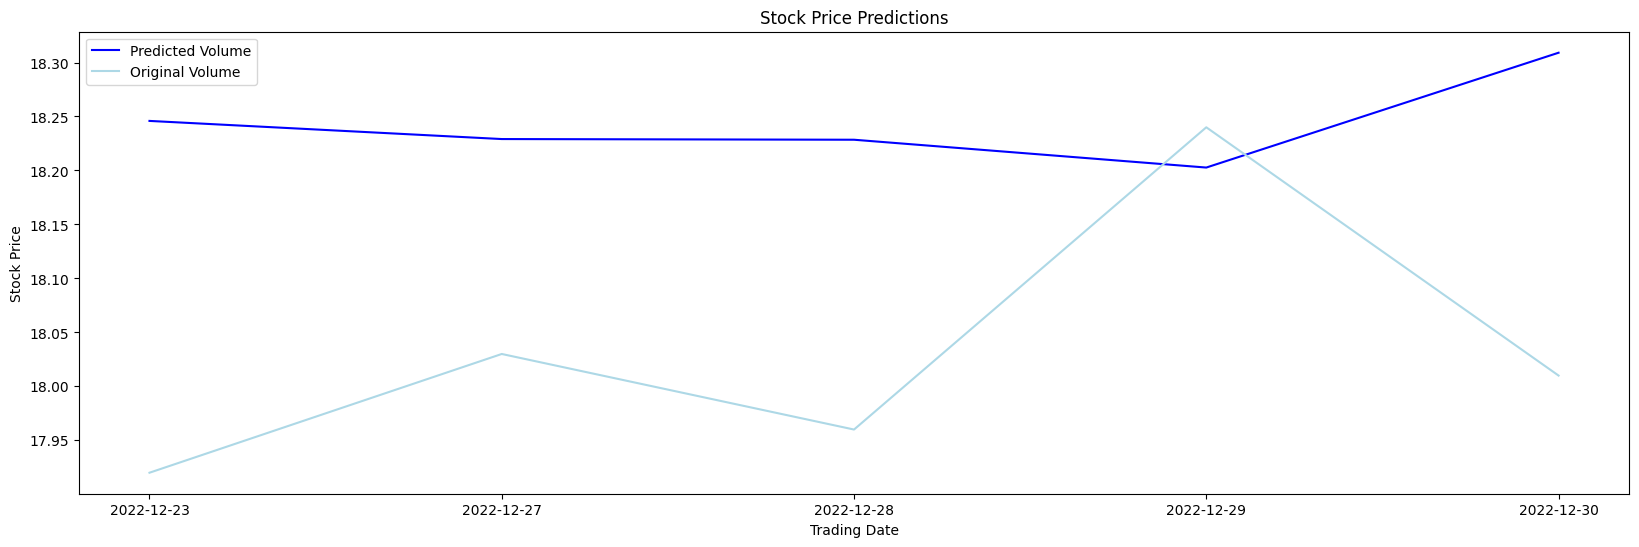

In [ ]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)

# Accuracy of the predictions
print('Accuracy:', 100 - (100*(abs(orig-predicted_Price)/orig)).mean())

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'].dt.date) # remove time from a pandas series of dates -df['Date'].dt.date
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

**Visualizing the predictions for full data**

Plotting the training and testing data both to see how good the LSTM model has fitted.

1/1 [==============================] - 0s 81ms/step


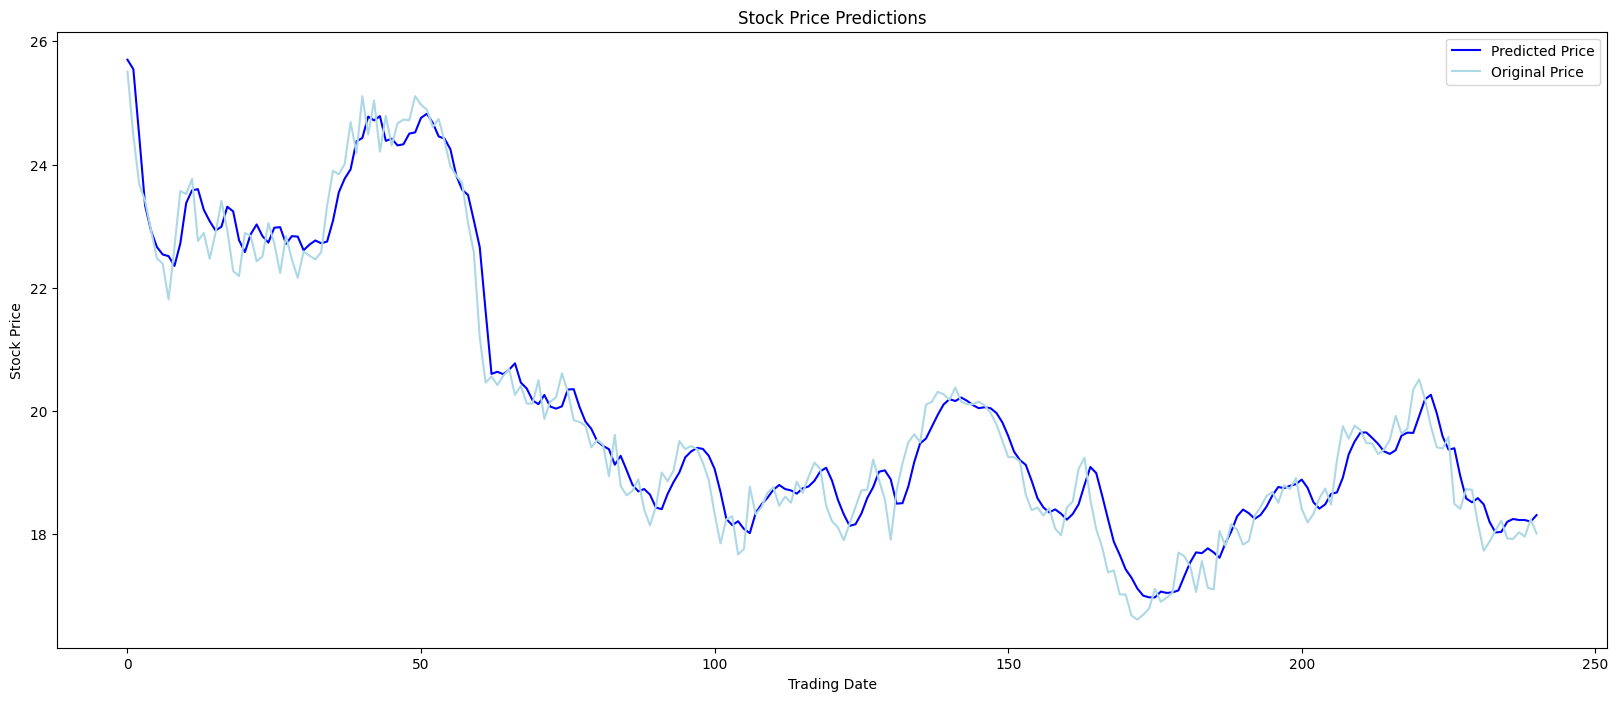

In [ ]:
# Generating predictions on full data
TrainPredictions=DataScaler.inverse_transform(regressor.predict(X_train))
TestPredictions=DataScaler.inverse_transform(regressor.predict(X_test))

FullDataPredictions=np.append(TrainPredictions, TestPredictions)
FullDataOrig=FullData[TimeSteps:]

# plotting the full data
plt.plot(FullDataPredictions, color = 'blue', label = 'Predicted Price')
plt.plot(FullDataOrig , color = 'lightblue', label = 'Original Price')


plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.ylabel('Stock Price')
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

**Predicting  the stock price for tomorrow**

If you want to predict the price for tomorrow, all you have to do is to pass the last 10 day’s prices to the model in 3D format as it was used in the training.

Taking the last 10 prices manually and do a single prediction for the next price.

In [ ]:
# Last 10 days prices
Last10Days=np.array([18.76, 18.76, 18.370001, 18.4, 18.6, 18.51,
18.700001, 18.99, 19.049999, 18.5])

# Normalizing the data just like we did for training the model
Last10Days=DataScaler.transform(Last10Days.reshape(-1,1))

# Changing the shape of the data to 3D
# Choosing TimeSteps as 10 because we have used the same for training
NumSamples=1
TimeSteps=10
NumFeatures=1
Last10Days=Last10Days.reshape(NumSamples,TimeSteps,NumFeatures)

#############################

# Making predictions on data
predicted_Price = regressor.predict(Last10Days)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

1/1 [==============================] - 0s 28ms/step


array([[18.859234]], dtype=float32)

Reference :  

https://www.geeksforgeeks.org/how-to-download-historical-stock-prices-in-python/

https://www.projectpro.io/article/stock-price-prediction-using-machine-learning-project/571

https://thinkingneuron.com/predicting-stock-prices-using-deep-learning-lstm-model-in-python/

https://www.kaggle.com/code/amarsharma768/stock-price-prediction-using-lstm/notebook

https://www.kaggle.com/code/vedanth777/infosys-stock-prediction-bi-lstm-with-conv-1d

https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm

https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/

